In [9]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from math import pi
from fractions import Fraction
import numpy as np
from numpy.random import randint

sim = Aer.get_backend('aer_simulator')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

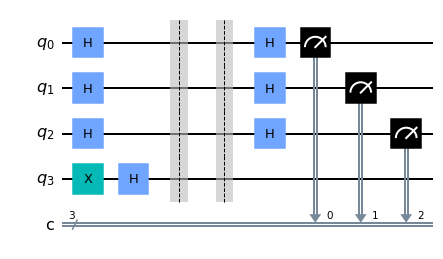

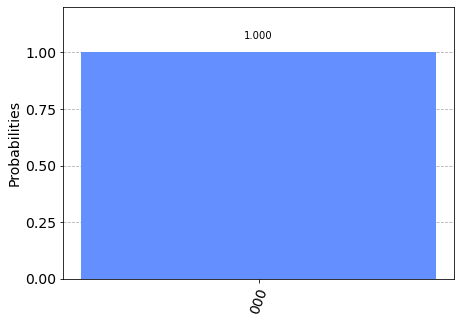

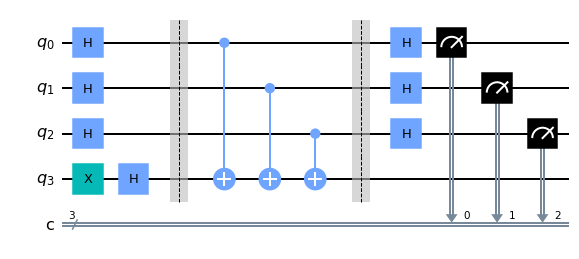

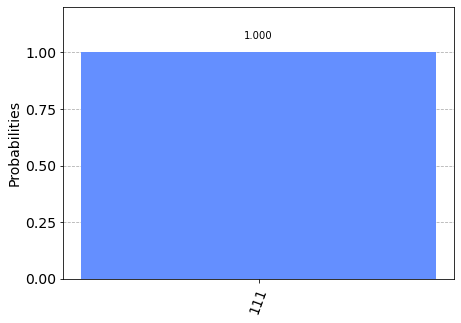

In [2]:
# Deutsch-Jozsa
n = 3

const_f = QuantumCircuit(n+1)
#display(const_f.draw())

balanced_f = QuantumCircuit(n+1)
for i in range(n):
    balanced_f.cx(i, n)
#display(balanced_f.draw())

for oracle in [const_f, balanced_f]:
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    qc.barrier()
    qc.compose(oracle, inplace=True)
    qc.barrier()
    for i in range(n):
        qc.h(i)
    for i in range(n):
        qc.measure(i, i)
    display(qc.draw())
    
    result = sim.run(qc).result()
    display(plot_histogram(result.get_counts()))

[0, 0, 0]

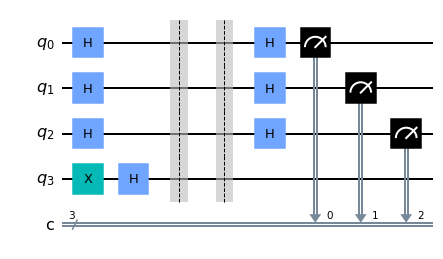

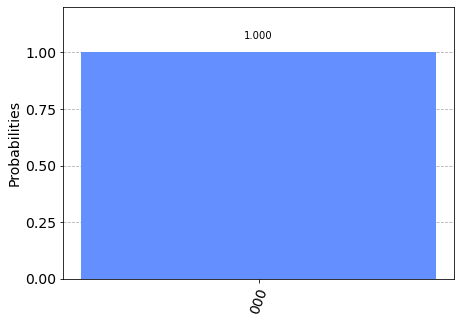

In [3]:
# Bernstein-Vazirani
n = 3
s = [randint(2) for i in range(n)]
display(list(reversed(s)))

qc = QuantumCircuit(n+1, n)
for i in range(n):
    qc.h(i)
qc.x(n)
qc.h(n)
qc.barrier()
for i in range(n):
    if s[i]:
        qc.cx(i, n)
qc.barrier()
for i in range(n):
    qc.h(i)
for i in range(n):
    qc.measure(i, i)
display(qc.draw())

result = sim.run(qc).result()
display(plot_histogram(result.get_counts()))

[1, 0, 1, 1, 0]

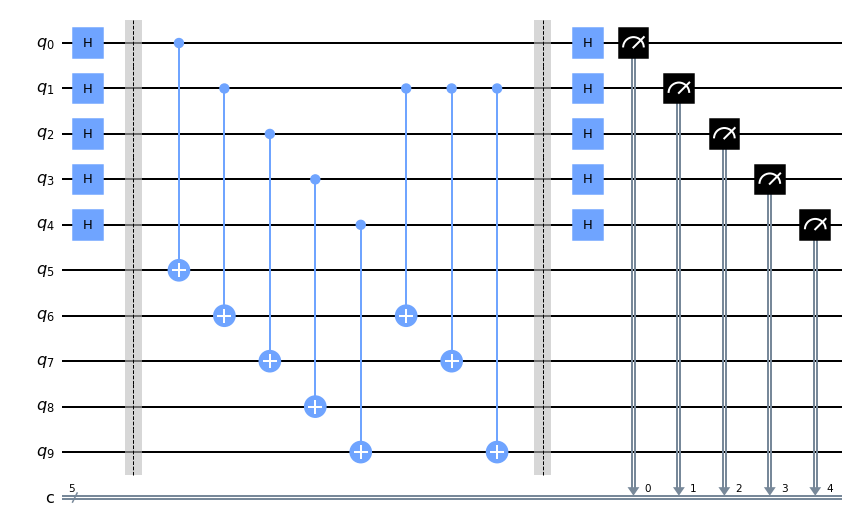

[array([0, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 0]),
 array([1, 0, 1, 0, 0]),
 array([1, 1, 0, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([0, 0, 0, 0, 0]),
 array([1, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1]),
 array([1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 0])]

Column 0: pivot row = 3


[array([1, 0, 1, 0, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 1, 1, 0]),
 array([0, 1, 1, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1]),
 array([1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 0])]

Column 1: pivot row = 2


[array([1, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 0, 1, 1, 0]),
 array([0, 0, 1, 1, 1]),
 array([0, 1, 0, 0, 1]),
 array([1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1]),
 array([1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 0])]

Column 2: pivot row = 3


[array([1, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 1]),
 array([1, 1, 0, 1, 0]),
 array([1, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1]),
 array([1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 0])]

Column 3: pivot row = 6


[array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 0, 0, 1]),
 array([1, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1]),
 array([1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 0])]

Column 4: pivot row = 4


[array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 1]),
 array([0, 0, 0, 0, 1]),
 array([1, 0, 1, 0, 1]),
 array([0, 0, 1, 1, 1]),
 array([1, 0, 0, 1, 0]),
 array([1, 1, 1, 0, 0]),
 array([1, 1, 1, 0, 1]),
 array([0, 1, 1, 1, 1]),
 array([1, 0, 0, 1, 1]),
 array([0, 0, 1, 1, 0])]

[1 0 1 1 0]


In [4]:
# Simon
n = 5
b = [randint(2) for i in range(n)]
if not np.any(b): # disallow all-zeros
    b[0] = 1
display(list(reversed(b)))

qc = QuantumCircuit(n*2, n)
for i in range(n):
    qc.h(i)
qc.barrier()

for i in range(n):
    qc.cx(i, n+i)
first_one = b.index(1)
for i in range(n):
    if b[i]:
        qc.cx(first_one, n+i)
    
qc.barrier()
for i in range(n):
    qc.h(i)
    qc.measure(i, i)
display(qc.draw())

result = sim.run(qc).result()

a = []
for s in result.get_counts():
    a.append(np.fromiter((int(b) for b in s), int))

# Work on one column at a time
for col in range(n):
    display(a)

    pivot = None
    for i in range(col, len(a)):
        if a[i][col]:
            pivot = i
            break
    if pivot is None:
        print(f'Column {col}: No suitable pivot row found')
        continue
    else:
        print(f'Column {col}: pivot row = {pivot}')

    # Move the pivot row to row 'col' and do elimination
    a[pivot], a[col] = a[col], a[pivot]
    for j in range(n):
        if col != j and a[j][col]:
            a[j] = np.bitwise_xor(a[j], a[col])

    # Remove all-zero vectors for readability
    a = list(filter(lambda x: np.sum(x) > 0, a))

# If a vector has a single '1' in any column, that means that bit must be zero
display(a)
answer = np.ones(n, dtype=int)
for s in a:
    if np.sum(s) == 1:
        answer[np.nonzero(s)[0][0]] = 0
print(answer)

In [5]:
# QFT
n = 4

def encode(qc, num, start_qbit=0):
    for i in range(start_qbit, qc.num_qubits):
        if num % 2 == 1:
            qc.x(i)
        num //= 2

def qft(n):
    qc = QuantumCircuit(n)
    for i in reversed(range(qc.num_qubits)):
        qc.h(i)
        angle = pi/(2**i)
        for j in range(i):
            qc.cp(angle, j, i)
            angle *= 2
    for i in range(n//2):
        qc.swap(i, n-i-1)
    qc.name = "QFT"
    return qc

for i in range(3):
    print(f"input = {i}")
    qc = QuantumCircuit(n)
    encode(qc, i)
    qc.barrier()
    qc = qc.compose(qft(n))
    qc.save_statevector()
    statevector = sim.run(qc).result().get_statevector()
    print(statevector)

input = 0
[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]
input = 1
[ 2.50000000e-01-3.06161700e-17j  2.30969883e-01+9.56708581e-02j
  1.76776695e-01+1.76776695e-01j  9.56708581e-02+2.30969883e-01j
  4.59242550e-17+2.50000000e-01j -9.56708581e-02+2.30969883e-01j
 -1.76776695e-01+1.76776695e-01j -2.30969883e-01+9.56708581e-02j
 -2.50000000e-01+3.06161700e-17j -2.30969883e-01-9.56708581e-02j
 -1.76776695e-01-1.76776695e-01j -9.56708581e-02-2.30969883e-01j
 -4.59242550e-17-2.50000000e-01j  9.56708581e-02-2.30969883e-01j
  1.76776695e-01-1.76776695e-01j  2.30969883e-01-9.56708581e-02j]
input = 2
[ 2.50000000e-01-3.06161700e-17j  1.76776695e-01+1.76776695e-01j
  4.59242550e-17+2.50000000e-01j -1.76776695e-01+1.76776695e-01j
 -2.50000000e-01+3.06161700e-17j -1.76776695e-01-1.76776695e-01j
 -4.59242550e-17-2.50000000e-01j  1.76776695e-01-1.76776695e-01j
  2.50000000e-01-3.06161700e-17j  1.767766

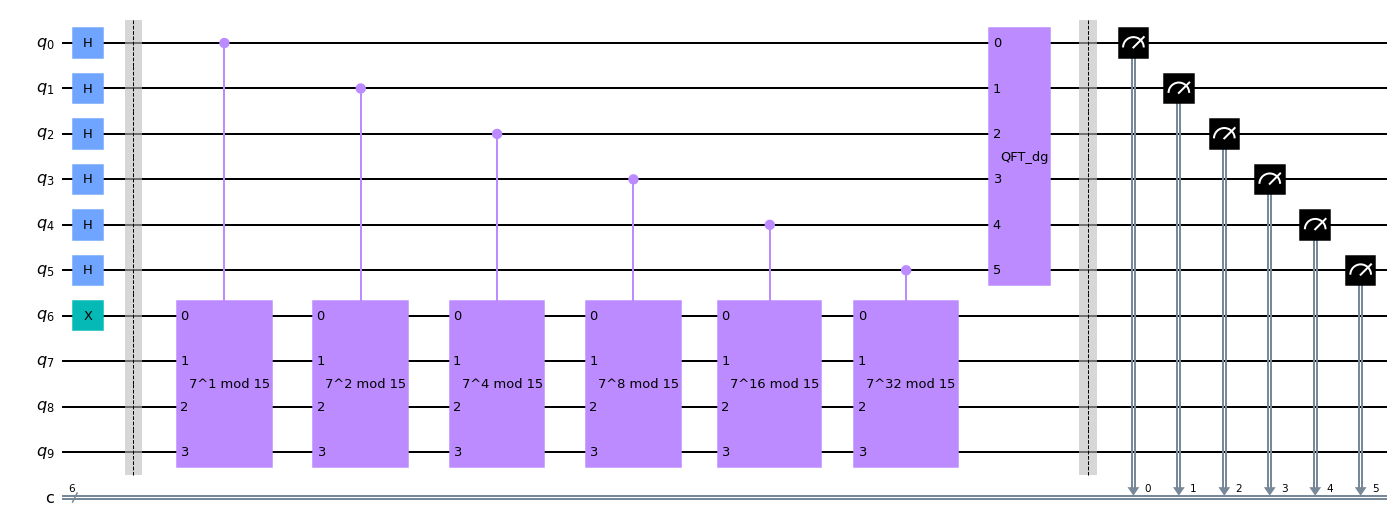

0.5 1/2
0.25 1/4
0.75 3/4
0.0 0


/Users/kichi/bin/miniforge3/envs/qi/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/kichi/bin/miniforge3/envs/qi/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [10]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

m = 6
n = 4
a = 7

qc = QuantumCircuit(m+n, m)
for i in range(m):
    qc.h(i)
encode(qc, 1, m)
qc.barrier()
for i in range(m):
    qc.append(c_amod15(a, 2**i), [i] + [m+j for j in range(n)])
qc.append(qft(m).inverse(), range(m))
qc.barrier()
qc.measure(range(m), range(m))
display(qc.draw(fold=-1))

qobj = assemble(transpile(qc, sim))
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

for output in counts:
    phase = int(output, 2)/(2**m)
    frac = Fraction(phase).limit_denominator(15)
    print(phase, frac)